In [1]:
#Imports
import numpy as np, pandas as pd, matplotlib.pyplot as plt
% matplotlib inline

In [2]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [3]:
control_df = df.query('group == "control"')

In [4]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [5]:
control_ctr

0.2797118847539016

In [6]:
experiment_df = df.query('group == "experiment"')

In [8]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [10]:
experiment_ctr

0.3097463284379172

In [11]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [26]:
#Bootstrap
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace = True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    expermiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr-control_ctr)
    

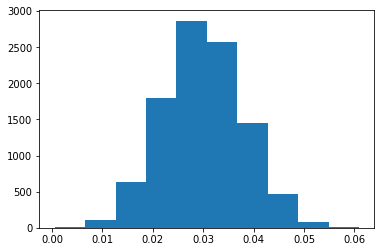

In [27]:
#histogram of the bootstrap sample for alternative
plt.hist(diffs);

In [28]:
#histogram for the null
diffs = np.array(diffs)
null_vals = np.random.normal(0,diffs.std(),diffs.size)

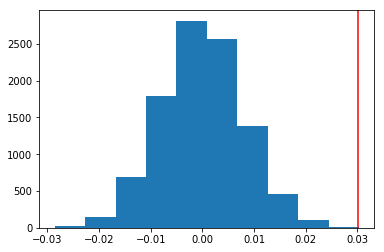

In [29]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='red');

In [30]:
(null_vals > obs_diff).mean()

0.0001